In [1]:

import seaborn as sns
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import mne

print(mne.sys_info())

Platform:      Linux-3.10.0-1062.18.1.el7.x86_64-x86_64-with-centos-7.7.1908-Core
Python:        3.7.1 (default, Dec 14 2018, 19:28:38)  [GCC 7.3.0]
Executable:    /home/dcellier/condaenvs/p3env/bin/python
CPU:           x86_64: 48 cores
Memory:        376.4 GB

mne:           0.18.2
numpy:         1.15.4 {blas=mkl_rt, lapack=mkl_rt}
scipy:         1.1.0
matplotlib:    3.0.2 {backend=module://ipykernel.pylab.backend_inline}

sklearn:       0.20.1
nibabel:       2.3.2
mayavi:        4.6.2 {qt_api=pyqt5, PyQt5=5.9.2}
cupy:          Not found
pandas:        0.23.4
dipy:          Not found
None


In [2]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/'
list_subs=os.listdir(ROOT_preproc)

preproc_cue_eps={}
preproc_probe_eps={}
for s in ['253']:#list_subs:
    if s !="245":
        cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue-epo.fif')
        probe=mne.read_epochs(ROOT_preproc+s+'/'+'probe events-epo.fif')
        preproc_cue_eps[s]=cue
        preproc_probe_eps[s]=probe

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/253/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
598 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/253/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
599 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated


In [3]:
preproc_cue_eps.keys()

dict_keys(['253'])

In [4]:
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/'
ROOT_raw=ROOT+'eeg_raw/'
unproc_cues={}
unproc_probes={}

for sub_name in preproc_cue_eps.keys():
    
    print('\nLOADING RAW FILE  FOR: '+sub_name+'\n')
    for bdfFile in os.listdir(ROOT_raw):
        if sub_name in bdfFile:
            raw_file=ROOT_raw+bdfFile

    if sub_name in ['261','245']:
        raw=mne.io.read_raw_fif(raw_file,preload=True)
    else:
        raw=mne.io.read_raw_bdf(raw_file,montage=mne.channels.read_montage('biosemi64'),preload=True)
        

        # # Finding Events (triggers) # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    if sub_name in ['224','247','251','249','254']:
        events=mne.find_events(raw,verbose=True,min_duration=(2/512))
    else:
        events = mne.find_events(raw, verbose=True)

    # # Looping through conditions, epoching # # # # # # #  # # # # # # # # # # # # # # # # # # # # # # # #

    #    startSaveflag=bytes([201])
    #    stopSaveflag=bytes([255])
    #    cue_trigDict={'dis_short_cue_trig': 101,
    #                 'dis_long_cue_trig':103,
    #                'tar_short_cue_trig':105,
    #               'tar_long_cue_trig':107,
    #              'neut_short_cue_trig':109,
     #             'neut_long_cue_trig':111}

    #    probe_trigDict={'dis_short_probe_trig': 113,
    #                 'dis_long_probe_trig':115,
    #                'tar_short_probe_trig':117,
    #               'tar_long_probe_trig':119,
    #              'neut_short_probe_trig':121,
     #             'neut_long_probe_trig':123}

    #    other_trigDict={'grey_placeholders_trig':125, 'ITI_trig':127,'subNonRespTrig':129,'subRespTrig':131}

    probe_event_id={'disShortProbe_trig':113,'disLongProbe_trig':115,'tarShortProbe_trig':117,
                    'tarLongProbe_trig':119,'neutShortProbe_trig':121,'neutLongProbe_trig':123}   
    #response_event_id={'subResp_trig':131,'subNonResp_trig':129}
    cue_event_id={'disShortCue_trig':101,'disLongCue_trig':103,'tarShortCue_trig':105,
                 'tarLongCue_trig':107,'neutShortCue_trig':109, 'neutLongCue_trig':111}

    cue_tmin, cue_tmax = -1.3,1 #-800 ms for baseline,plus grey placeholders 500ms long, then 100ms or 1000ms for cue time
    probe_tmin, probe_tmax = 0,5.4 # 2 second probe/response period + min ITI 3400ms
    #response_tmin,response_tmax=-0.5,1.5 # probably won't analyze this but might as well have it
    baseline = (None, -0.3) #baseline correction applied with mne.Epochs, this is starting @ beginning of epoch ie -0.8 

    print('\n\n\n Epoching Conds \n ')

    unproc_cues[sub_name]=mne.Epochs(raw, events=events, baseline=baseline, event_id=cue_event_id, tmin=cue_tmin,tmax=cue_tmax)
        

    unproc_probes[sub_name]=mne.Epochs(raw, events=events, baseline=(2,5.4), event_id=probe_event_id, tmin=probe_tmin, tmax=probe_tmax)



LOADING RAW FILE  FOR: 253

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/sub_253_alpha_placeholders_02_18_20.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2334719  =      0.000 ...  4559.998 secs...


<ipython-input-4-9a929c257a85>:16: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']. Their position has been left untouched.
  raw=mne.io.read_raw_bdf(raw_file,montage=mne.channels.read_montage('biosemi64'),preload=True)


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
3051 events found
Event IDs: [  101   103   105   107   109   111   113   115   117   119   121   123
   125   127   129   131   133   135   151   153   155   157   159   161
   163   165   167   169   201   205   233 65536]



 Epoching Conds 
 
600 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
600 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [5]:
unproc_cues.keys()

dict_keys(['253'])

In [6]:
print(len(preproc_cue_eps['253'].events))
print(len(unproc_cues['253'].events))

598
600


In [7]:
#unproc_cues['253'].copy().drop(bool_vals).drop_log==exDL

In [8]:
for sub_name in preproc_cue_eps.keys():
    
    print("\nLOADING SUB "+sub_name+'\n')

    thisSub_dropLog=preproc_cue_eps[sub_name].drop_log
    thisSub_bool_vals=[]

    for ev in thisSub_dropLog:
        if ev==[]: # if the epoch is represented by an empty list 
                   # this means it still remains in the preproc epochs obj
            thisSub_bool_vals.append(False)
        elif ev==['USER']:
            thisSub_bool_vals.append(True)

    assert len(thisSub_bool_vals)==len(unproc_cues[sub_name].events)
    
    unproc_cues_matchingEps=unproc_cues[sub_name].copy().drop(thisSub_bool_vals) 
        #generating a ver with dropped epochs
        
    print(len(unproc_cues_matchingEps.events))
    assert len(unproc_cues_matchingEps.events) == len(preproc_cue_eps[sub_name].events)
    assert unproc_cues_matchingEps.drop_log == thisSub_dropLog
        # making sure it's the right # of events
        # and has a matching drop log
        # before replacing this item in the unproc_cues dictionary

    unproc_cues[sub_name]=unproc_cues_matchingEps


LOADING SUB 253

Dropped 2 epochs
598


In [9]:
unproc_dig=unproc_cues['253'].copy().load_data().pick_channels(ch_names=['EXG1','EXG2','EXG3','EXG4']).info['dig']

Loading data for 598 events and 1179 original time points ...
0 bad epochs dropped


In [10]:
preproc_dig=preproc_cue_eps['253'].info['dig']

[a for a in zip(unproc_dig,preproc_dig)]

[(<DigPoint |        LPA : (-77036.2, -0.0, -35922.6) mm : head frame>,
  <DigPoint |        LPA : (-77036.2, -0.0, -35922.6) mm : head frame>),
 (<DigPoint |     Nasion : (0.0, 77036.2, -35922.6) mm : head frame>,
  <DigPoint |     Nasion : (0.0, 77036.2, -35922.6) mm : head frame>),
 (<DigPoint |        RPA : (77036.2, 0.0, -35922.6) mm : head frame>,
  <DigPoint |        RPA : (77036.2, 0.0, -35922.6) mm : head frame>),
 (<DigPoint |     EEG #1 : (-34531.0, 74051.9, 23429.2) mm : head frame>,
  <DigPoint |     EEG #1 : (-34531.0, 74051.9, 23429.2) mm : head frame>),
 (<DigPoint |     EEG #2 : (34531.0, 74051.9, 23429.2) mm : head frame>,
  <DigPoint |     EEG #2 : (34531.0, 74051.9, 23429.2) mm : head frame>),
 (<DigPoint |     EEG #3 : (-49931.3, 68724.6, -2966.5) mm : head frame>,
  <DigPoint |     EEG #3 : (-49931.3, 68724.6, -2966.5) mm : head frame>),
 (<DigPoint |     EEG #4 : (49931.3, 68724.6, -2966.5) mm : head frame>,
  <DigPoint |     EEG #4 : (49931.3, 68724.6, -2966.5) 

In [28]:
preproc_cue_eps['253'].info['ch_names']

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'Status']

In [11]:
dist_of_epochs=[]
for ep in preproc_cue_eps['253']:
    print(ep.shape)
    print(np.max(ep)-np.min(ep))
    dist_of_epochs.append(np.max(ep)-np.min(ep))

(65, 1179)
125.00003711260895
(65, 1179)
125.00003653535998
(65, 1179)
125.00003159306783
(65, 1179)
125.00003530685463
(65, 1179)
125.0000622952388
(65, 1179)
125.0000384464556
(65, 1179)
125.00004418219451
(65, 1179)
125.00003480540657
(65, 1179)
125.00003076177518
(65, 1179)
125.00003204730584
(65, 1179)
125.00003325811606
(65, 1179)
125.00002927386012
(65, 1179)
125.00003114974376
(65, 1179)
125.0000362715083
(65, 1179)
125.00003183858773
(65, 1179)
125.00003203470024
(65, 1179)
125.00006020419784
(65, 1179)
125.00003458624747
(65, 1179)
125.00002842680775
(65, 1179)
125.00002787701095
(65, 1179)
125.00005243361382
(65, 1179)
125.00003265749672
(65, 1179)
125.00006470904488
(65, 1179)
125.000042347129
(65, 1179)
125.0000360416499
(65, 1179)
125.00003231423888
(65, 1179)
125.00003117773801
(65, 1179)
125.00003202957433
(65, 1179)
125.00003519044294
(65, 1179)
125.00003323683389
(65, 1179)
125.00004155953573
(65, 1179)
125.00003663557537
(65, 1179)
125.00003097385114
(65, 1179)
125.0

(65, 1179)
125.00002545302036
(65, 1179)
125.00002867302976
(65, 1179)
125.00003133258856
(65, 1179)
131.0000387931986
(65, 1179)
125.00002703156291
(65, 1179)
125.00003197360768
(65, 1179)
125.0000357687724
(65, 1179)
131.00003026788136
(65, 1179)
125.00002543239302
(65, 1179)
125.00003811737862
(65, 1179)
125.0000428279388
(65, 1179)
125.00003216734095
(65, 1179)
125.0000338215189
(65, 1179)
125.00008926513843
(65, 1179)
125.00002764662868
(65, 1179)
125.0000278828881
(65, 1179)
125.0000244826696
(65, 1179)
131.00003966766678
(65, 1179)
131.0000352183917
(65, 1179)
125.0000321649035
(65, 1179)
125.0000293667741
(65, 1179)
125.00003659242894
(65, 1179)
125.00003021915975
(65, 1179)
125.00017079677883
(65, 1179)
131.0000361269332
(65, 1179)
131.00004137718568
(65, 1179)
125.00007549537492
(65, 1179)
131.00004658821166
(65, 1179)
125.00002392745222
(65, 1179)
125.00002791496235
(65, 1179)
131.00003438644057
(65, 1179)
125.00003306516132
(65, 1179)
125.00003830373043
(65, 1179)
125.00003

In [12]:
#len(dist_of_epochs)
#list(range(0,len(preproc_cue_eps['253'])))

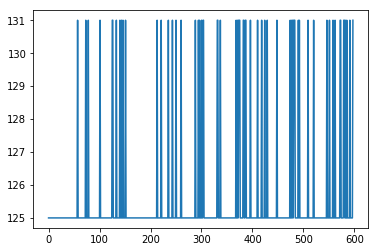

In [19]:
plt.plot(np.asarray(range(0,598)),np.asarray(dist_of_epochs))
#plt.plot([1,2,3],[1,2,3],'go-')
plt.show()

In [26]:
(np.max(dist_of_epochs)-np.min(dist_of_epochs))/2

3.0

In [32]:
preproc_cue_eps['253'][1]

<EpochsFIF  |   1 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~770 kB, data loaded, with metadata,
 'neutShortCue_trig': 1>

In [33]:
[2]*2

[2, 2]

In [15]:
#unproc_cues['240'].info

In [16]:
#unproc_cues['240'].info['ch_names']

Loading data for 599 events and 1179 original time points ...
Setting up band-pass filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 1691 samples (3.303 sec)



<ipython-input-37-732beb4ac4f0>:1: RuntimeWarning: filter_length (1691) is longer than the signal (1179), distortion is likely. Reduce filter length or filter a longer signal.
  unproc_cues['240'].load_data().filter(1,60).plot(picks=['EXG1','EXG2','EXG3','EXG4'])


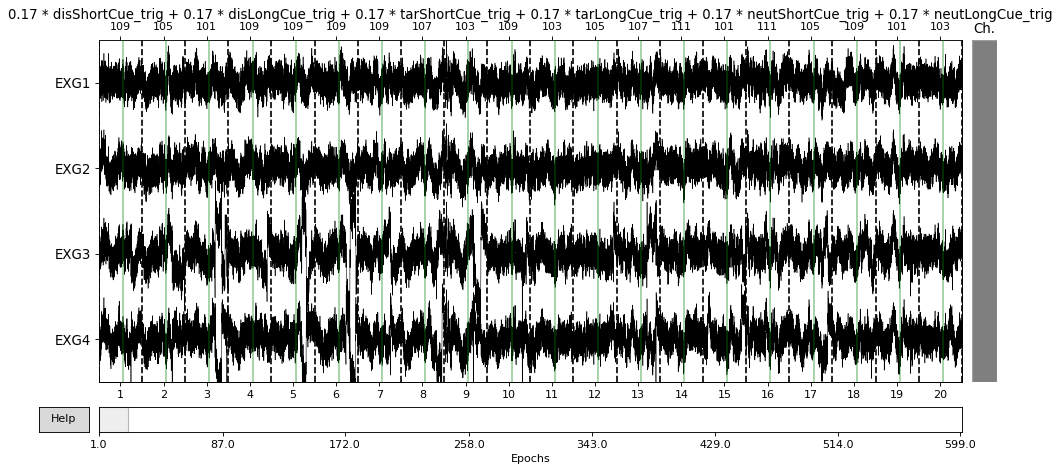

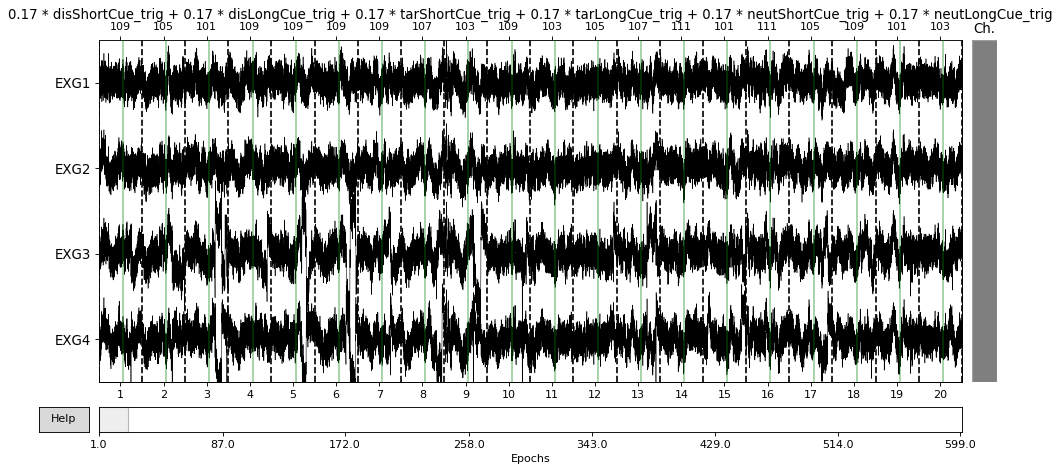

In [37]:
unproc_cues['240'].load_data().filter(1,60).plot(picks=['EXG1','EXG2','EXG3','EXG4'])